In [1]:
import bs4
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import pandas as pd
import numpy as nd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
title = []
author = []
avg_rating = []
num_ratings = [] 
my_rating = [] 

pages = [str(i) for i in range(1,6)]

for page in pages: 
    url = 'https://www.goodreads.com/review/list/79783610?page=' + page 

    uClient = uReq(url)
    page_html = uClient.read()
    uClient.close()

    # grabbing the content 
    page_soup = soup(page_html, "html.parser")
    
    containers = page_soup.findAll("tr", {"class":"bookalike review"})
    
    for container in containers:
        book_title = container.findAll("td",{"class":"field title"})[0].text.replace("title","").replace("\n","").strip()
        title.append(book_title)
        book_author = container.findAll("td", {"class":"field author"})[0].text.replace("author ", "").replace("\n","").replace("*","")
        author.append(book_author)
        avg = container.findAll("td",{"class":"field avg_rating"})[0].text.replace("avg rating","").replace("\n", "").strip()
        avg_rating.append(float(avg))
        num = container.findAll("td", {"class":"field num_ratings"})[0].text.replace("num ratings", "").replace("\n","").replace(",","").strip()
        num_ratings.append(int(num))
        my_review = container.findAll("span", {"class":" staticStars"})[0].text

        if my_review == "it was amazing":
            book_stars = 5
        if my_review == "really liked it":
            book_stars = 4
        if my_review == "liked it":
            book_stars = 3
        if my_review == "it was ok":
            book_stars = 2
        if my_review == "did not like it":
            book_stars = 1

        my_rating.append(int(book_stars))
        
data = pd.DataFrame({
    "Book Title": title,
    "Author": author,
    "GoodReads Rating": avg_rating,
    "Num of GoodReads Ratings": num_ratings,
    "My Rating": my_rating,
})

data.head(5)

,Book Title,Author,GoodReads Rating,Num of GoodReads Ratings,My Rating
0,Lullaby,"Palahniuk, Chuck",3.73,81675,5
1,"The Secret (The Secret, #1)","Byrne, Rhonda",3.65,286480,5
2,The Four Agreements: A Practical Guide to Pers...,"Ruiz, Miguel",4.14,140197,4
3,The Perks of Being a Wallflower,"Chbosky, Stephen",4.20,1074014,5
4,A Thousand Years of Good Prayers,"Li, Yiyun",3.89,2306,4


In [3]:
data.sort_values('Num of GoodReads Ratings', ascending=False).reset_index(drop=True)

,Book Title,Author,GoodReads Rating,Num of GoodReads Ratings,My Rating
0,Harry Potter and the Sorcerer's Stone (...,"Rowling, J.K.",4.46,5707385,5
1,"The Hunger Games (The Hunger Games, #1)","Collins, Suzanne",4.33,5591289,5
2,To Kill a Mockingbird,"Lee, Harper",4.27,3799267,5
3,The Great Gatsby,"Fitzgerald, F. Scott",3.91,3188131,4
4,Pride and Prejudice,"Austen, Jane",4.25,2491744,4
5,1984,"Orwell, George",4.16,2477663,5
6,The Catcher in the Rye,"Salinger, J.D.",3.80,2366841,5
7,"Angels & Demons (Robert Langdon, #1)","Brown, Dan",3.88,2325821,5
8,The Diary of a Young Girl,"Frank, Anne",4.12,2322495,4
9,Animal Farm,"Orwell, George",3.91,2268767,5


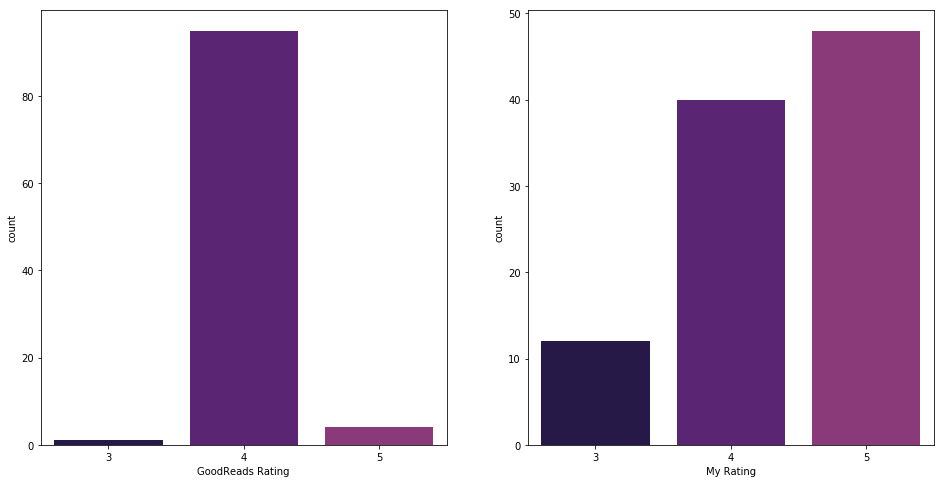

In [12]:
f, ax = plt.subplots(1,2, figsize=(16,8))
# floats rounded to int
data_two = data
data_two['GoodReads Rating'] = data['GoodReads Rating'].round(0).astype(int)
sns.countplot(x="GoodReads Rating", data=data_two, palette=sns.color_palette('magma'), ax=ax[0])
sns.countplot(x="My Rating", data=data, palette=sns.color_palette('magma'), ax=ax[1])

In [5]:
# first assumption: the more people voted, the higher the overall ratings
data['GoodReads Rating'].corr(data['Num of GoodReads Ratings'])
# conclusion: low correlation

0.3754675944045629

C:\Users\ica\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


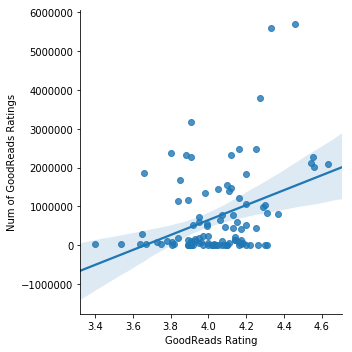

In [6]:
# low correlation visualization
sns.lmplot(x="GoodReads Rating", y="Num of GoodReads Ratings", data=data)

In [7]:
# second assumption: my ratings would have a high correlation with the overall ratings
data['GoodReads Rating'].corr(data['My Rating'])
# conclusion: no correlation 

0.019798346838336995

C:\Users\ica\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


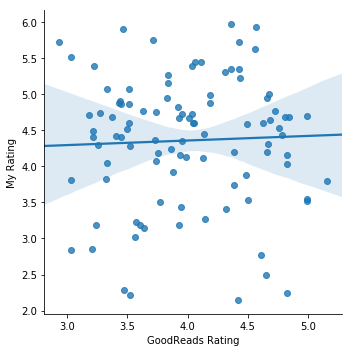

In [8]:
sns.lmplot(x="GoodReads Rating", y="My Rating", y_jitter=True, x_jitter=True, data=data)

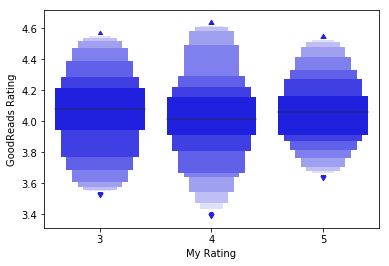

In [9]:
sns.boxenplot(x="My Rating", y="GoodReads Rating",
              color="b", scale="linear", data=data)

# most of my ratings' mean are centered around 4.0

In [10]:
# since all of my ratings are int while GoodReads ratings are floats, 
# I rounded them to see if the correlation would change 
data_two # rounded version of data 
data_two['GoodReads Rating'].corr(data['My Rating'])
# conclusion: no correlation, in fact negative result

-0.07106395153099045

In [24]:
# assumption three: the higher the rating, the more 'positive' sentiment the book title
from textblob import TextBlob

def detect_polarity(text):
    return TextBlob(text).sentiment.polarity

data_two['Polarity'] = data_two['Book Title'].apply(detect_polarity)
data_two.sort_values('Polarity')

,Book Title,Author,GoodReads Rating,Num of GoodReads Ratings,My Rating,Polarity
1,"The Secret (The Secret, #1)","Byrne, Rhonda",4,286480,5,-0.400000
55,The Secret Garden,"Burnett, Frances Hodgson",4,772053,4,-0.400000
42,Chicken Soup for the Romantic Soul,"Canfield, Jack",4,5,4,-0.300000
76,The Little Prince,"Saint-Exupéry, Antoine de",4,1049082,4,-0.187500
67,Little Women,"Alcott, Louisa May",4,1448937,4,-0.187500
94,Freakonomics: A Rogue Economist Explores the H...,"Levitt, Steven D.",4,603613,5,-0.166667
20,Down and Out in Paris and London,"Orwell, George",4,48198,4,-0.155556
0,Lullaby,"Palahniuk, Chuck",4,81675,5,0.000000
66,"The Hunger Games (The Hunger Games, #1)","Collins, Suzanne",4,5591289,5,0.000000
65,Harry Potter and the Prisoner of Azkaban ...,"Rowling, J.K.",5,2261631,4,0.000000


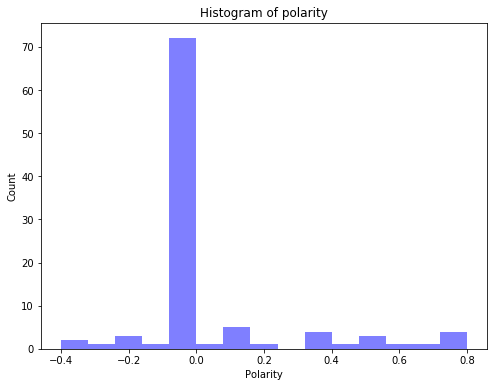

In [36]:
num_bins = 15
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(data_two['Polarity'], num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

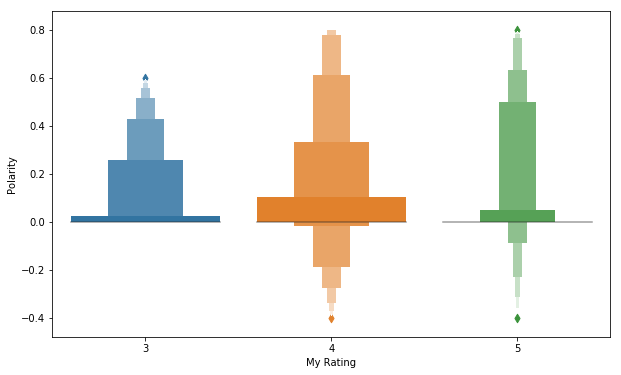

In [42]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='My Rating', y='Polarity', data=data_two)
plt.show()

In [47]:
# from the plots, we can see that my assumption was entirely false. 
# highly rated books still had negative sentiments
data_two.sort_values('Polarity', ascending=False).head(5)
# words like "Great" triggered high polarity scores 

,Book Title,Author,GoodReads Rating,Num of GoodReads Ratings,My Rating,Polarity
95,How to Win Friends and Influence People,"Carnegie, Dale",4,413790,4,0.80
9,World Mythology: An Anthology of Great Myths a...,"Rosenberg, Donna",4,726,5,0.80
84,The Great Gatsby,"Fitzgerald, F. Scott",4,3188131,4,0.80
38,Good to Great: Why Some Companies Make the Lea...,"Collins, James C.",4,100639,5,0.75
4,A Thousand Years of Good Prayers,"Li, Yiyun",4,2306,4,0.70


In [46]:
data_two.sort_values('Polarity').head(5)
# On the other hand, words like "secret" triggered lower polarity scores

,Book Title,Author,GoodReads Rating,Num of GoodReads Ratings,My Rating,Polarity
1,"The Secret (The Secret, #1)","Byrne, Rhonda",4,286480,5,-0.4000
55,The Secret Garden,"Burnett, Frances Hodgson",4,772053,4,-0.4000
42,Chicken Soup for the Romantic Soul,"Canfield, Jack",4,5,4,-0.3000
76,The Little Prince,"Saint-Exupéry, Antoine de",4,1049082,4,-0.1875
67,Little Women,"Alcott, Louisa May",4,1448937,4,-0.1875
